Tasks
___________________________________________________

1. Importing Libraries & Dataset.
2. Addressing PII Data.
3. Comparing Customer Behaviour in different regions.
4. Creating exclusion flag for low activity customers.
5. Profiling Customers.
6. Visualisation for profile distribution.
7. Comparing customers profile based on region and department.
8. Creating charts to illustrate results.
9. Exporting final dataset.

In [1]:
# Importing Libraries and Dataset

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

In [2]:
path = r'/Users/vineetasinha/Documents/dataanalytics/tasks/Data-Immersion/Achievement4/Instacart_Basket_Analysis'

In [3]:
df_final_proj=pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data','Cust_ord_prod.pkl'))

In [4]:
# Addressing PII Data

df_final_proj.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,User_id,order_number,order_dow,...,Order_Frequency_Flag,First Name,Last Name,State,Age,Joining_Date,Total_Dependants,Status,Income,exists
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Frequent Customer,Charles,Cox,Minnesota,81,8/1/2019,1,married,49620,both
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Frequent Customer,Charles,Cox,Minnesota,81,8/1/2019,1,married,49620,both
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,...,Frequent Customer,Charles,Cox,Minnesota,81,8/1/2019,1,married,49620,both
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,...,Frequent Customer,Charles,Cox,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,1000,Apricots,18,10,12.9,505689,138,9,6,...,Frequent Customer,Charles,Cox,Minnesota,81,8/1/2019,1,married,49620,both


# This dataset contains PII information as first name, last name, state, age, status of the customer.

In [5]:
#Creating new column as Region


df_final_proj.loc[(df_final_proj['State'] == 'Minnesota')
                  |(df_final_proj['State'] == 'Wisconsin')
                  |(df_final_proj['State'] == 'Michigan')
                  |(df_final_proj['State'] == 'Illinois')
                  |(df_final_proj['State'] == 'Indiana')
                  |(df_final_proj['State'] == 'Ohio')
                  |(df_final_proj['State'] == 'North Dakota')
                  |(df_final_proj['State'] == 'South Dakota')
                  |(df_final_proj['State'] == 'Nebraska') 
                  |(df_final_proj['State'] == 'Kansas')
                  |(df_final_proj['State'] == 'Iowa')
                  |(df_final_proj['State'] == 'Missouri') , 'Region'] = 'Midwest'

In [6]:
df_final_proj.loc[(df_final_proj['State'] == 'Maine')
                  |(df_final_proj['State'] == 'New Hampshire')
                  |(df_final_proj['State'] == 'Vermont')
                  |(df_final_proj['State'] == 'Massachusetts')
                  |(df_final_proj['State'] == 'Rhode Island')
                  |(df_final_proj['State'] == 'Connecticut')
                  |(df_final_proj['State'] == 'New York')
                  |(df_final_proj['State'] == 'Pennsylvania')
                  |(df_final_proj['State'] == 'New Jersey')  , 'Region'] = 'Northeast'

In [7]:
df_final_proj.loc[(df_final_proj['State'] == 'Delaware')
                  |(df_final_proj['State'] == 'Maryland')
                  |(df_final_proj['State'] == 'District of Columbia')
                  |(df_final_proj['State'] == 'Virginia')
                  |(df_final_proj['State'] == 'West Virginia')
                  |(df_final_proj['State'] == 'North Carolina')
                  |(df_final_proj['State'] == 'South Carolina')
                  |(df_final_proj['State'] == 'Georgia')
                  |(df_final_proj['State'] == 'Florida')
                  |(df_final_proj['State'] == 'Kentucky')
                  |(df_final_proj['State'] == 'Tennessee')
                  |(df_final_proj['State'] == 'Mississippi')
                  |(df_final_proj['State'] == 'Alabama')
                  |(df_final_proj['State'] == 'Oklahoma')
                  |(df_final_proj['State'] == 'Texas')
                  |(df_final_proj['State'] == 'Arkansas')
                  |(df_final_proj['State'] == 'Louisiana') , 'Region'] = 'South'

In [8]:
df_final_proj.loc[(df_final_proj['State'] == 'Idaho')
                  |(df_final_proj['State'] == 'Montana')
                  |(df_final_proj['State'] == 'Michigan')
                  |(df_final_proj['State'] == 'Wyoming')
                  |(df_final_proj['State'] == 'Nevada')
                  |(df_final_proj['State'] == 'Utah')
                  |(df_final_proj['State'] == 'Colorado')
                  |(df_final_proj['State'] == 'Arizona')
                  |(df_final_proj['State'] == 'New Mexico') 
                  |(df_final_proj['State'] == 'Alaska')
                  |(df_final_proj['State'] == 'Washington')
                  |(df_final_proj['State'] == 'Oregon')
                  |(df_final_proj['State'] == 'California')
                  |(df_final_proj['State'] == 'Hawaii'), 'Region'] = 'West'

In [9]:
df_final_proj['Spending_Flag'].value_counts(dropna = False)

Spending_Flag
Low Spender     805506
High Spender    193105
nan               1389
Name: count, dtype: int64

In [10]:
df_final_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Unnamed: 0                 1000000 non-null  int64   
 1   product_id                 1000000 non-null  int64   
 2   product_name               1000000 non-null  object  
 3   aisle_id                   1000000 non-null  int64   
 4   department_id              1000000 non-null  int64   
 5   prices                     1000000 non-null  float64 
 6   order_id                   1000000 non-null  int64   
 7   User_id                    1000000 non-null  int64   
 8   order_number               1000000 non-null  int64   
 9   order_dow                  1000000 non-null  int64   
 10  order_hour_of_day          1000000 non-null  int64   
 11  days_since_prior_order     933795 non-null   float64 
 12  add_to_cart_order          1000000 non-null  int64   
 13

In [11]:
df_spending_habbit = df_final_proj.groupby('Region')['Spending_Flag'].value_counts().unstack()

In [12]:
df_spending_habbit

Spending_Flag,High Spender,Low Spender,nan
Region,,,
Midwest,41616,172427,281
Northeast,34342,142300,263
South,63531,269293,513
West,53616,221486,332


# There doesn't seems to be much difference between the spending habbits in different regions.

In [13]:
crosstab = pd.crosstab(df_final_proj['Region'], df_final_proj['Spending_Flag'], dropna=False)

In [14]:
crosstab.to_clipboard()

Text(0.5, 1.0, 'Spending habbits in different regions')

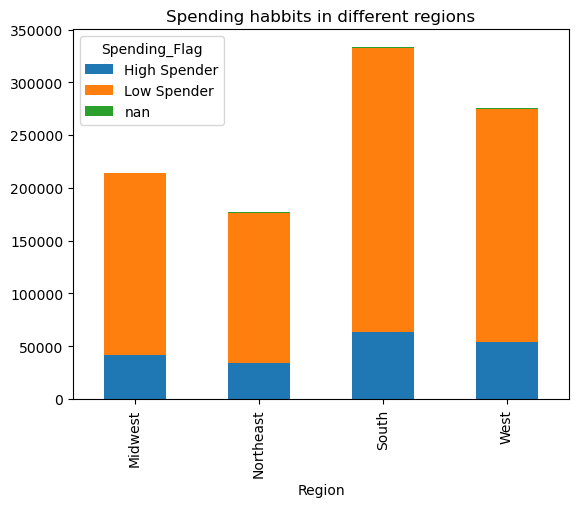

In [15]:
bar = df_spending_habbit.plot.bar(stacked=True)
plt.title('Spending habbits in different regions')

In [16]:
# Creating Exclusion flag for low activity Customers

df_final_proj.loc[(df_final_proj['max_order']<5), 'Activity'] = 'Low Activity Customer'

In [17]:
df_final_proj['Activity'].value_counts()

Activity
nan                      921270
Low Activity Customer     78730
Name: count, dtype: int64

In [18]:
df_final_proj.shape

(1000000, 36)

In [19]:
df_final_data_subset = df_final_proj[df_final_proj['Activity']!= 'Low Activity Customer']

In [20]:
df_final_data_subset.shape

(921270, 36)

In [21]:
df_final_data_subset['Activity'].value_counts()

Activity
nan    921270
Name: count, dtype: int64

In [22]:
# Exporting the new subset

df_final_data_subset.to_pickle(os.path.join(path,'02_Data','Prepared_Data','Final_Data.pkl'))

# Profiling Customers based on age, income, certain goods, number of dependants

In [23]:
# Importing the new subset of data to work with

df_final_data=pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data','Final_Data.pkl'))

In [24]:
df_final_data['Total_Dependants'].value_counts()

Total_Dependants
0    231318
2    230785
3    230669
1    228498
Name: count, dtype: int64

# Age Category
# (<= 35 - Young Adult), (> 35 & < 65 - Adult) ,  (>= 65 - Elderly)

In [25]:
df_final_data.loc[df_final_data['Age']<=35 , 'Age Category'] = 'Young Adult'


In [26]:
df_final_data.loc[(df_final_data['Age']>35) & (df_final_data['Age']<65), 'Age Category'] = 'Adult'


In [27]:
df_final_data.loc[df_final_data['Age']>=65, 'Age Category'] = 'Elderly'

In [28]:
df_final_data['Age Category'].value_counts()

Age Category
Adult          417469
Young Adult    260129
Elderly        243672
Name: count, dtype: int64

# Income Category
# (<= 50000- Low Income), (> 50000 & < 250000 - Average Income) ,  (>= 250000 - High Income)

In [29]:
df_final_data.loc[df_final_data['Income']<=70000, 'Income Category']= 'Low Income'

In [30]:
df_final_data.loc[(df_final_data['Income']>70000) & (df_final_data['Income']<250000), 'Income Category'] = 'Average Income'

In [31]:
df_final_data.loc[df_final_data['Income']>=250000, 'Income Category'] = 'High Income'

In [32]:
df_final_data['Income Category'].value_counts()

Income Category
Average Income    657999
Low Income        256330
High Income         6941
Name: count, dtype: int64

# Total Dependants Category
# 0 = No Dependants, >0 = Dependants

In [33]:
df_final_data.loc[df_final_data['Total_Dependants']== 0 , 'Dependants Category']= 'No Dependants'

In [34]:
df_final_data.loc[df_final_data['Total_Dependants']!= 0 , 'Dependants Category']= 'With Dependants'

In [35]:
df_final_data['Dependants Category'].value_counts()

Dependants Category
With Dependants    689952
No Dependants      231318
Name: count, dtype: int64

In [36]:
df_final_data.head(2)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,User_id,order_number,order_dow,...,Joining_Date,Total_Dependants,Status,Income,exists,Region,Activity,Age Category,Income Category,Dependants Category
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,8/1/2019,1,married,49620,both,Midwest,nan,Elderly,Low Income,With Dependants
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,8/1/2019,1,married,49620,both,Midwest,nan,Elderly,Low Income,With Dependants


# Creating Customer Profile column

In [37]:
df_final_data['Customer_Profile'] = df_final_data['Age Category'] + '_' + df_final_data['Income Category'] + '_' + df_final_data['Dependants Category']

In [38]:
df_final_data['Customer_Profile1'] = df_final_data['Age Category'] + '_' + df_final_data['Income Category']

In [39]:
df_final_data['Customer_Profile'].value_counts()

Customer_Profile
Adult_Average Income_With Dependants          244644
Elderly_Average Income_With Dependants        155275
Young Adult_Low Income_With Dependants        100574
Young Adult_Average Income_With Dependants     93574
Adult_Average Income_No Dependants             82619
Adult_Low Income_With Dependants               64346
Elderly_Average Income_No Dependants           51575
Young Adult_Low Income_No Dependants           34750
Young Adult_Average Income_No Dependants       30312
Elderly_Low Income_With Dependants             26567
Adult_Low Income_No Dependants                 21968
Elderly_Low Income_No Dependants                8125
Adult_High Income_With Dependants               2787
Elderly_High Income_With Dependants             1543
Adult_High Income_No Dependants                 1105
Young Adult_High Income_With Dependants          642
Elderly_High Income_No Dependants                587
Young Adult_High Income_No Dependants            277
Name: count, dtype: int64

# Customer profile with department 

In [40]:
Departments = (df_final_data.groupby('Customer_Profile')['department_id']
                    .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                    .reset_index(name='departments'))

In [41]:
Departments

,Customer_Profile,departments
0,Adult_Average Income_No Dependants,"[16, 4, 1]"
1,Adult_Average Income_With Dependants,"[16, 4, 1]"
2,Adult_High Income_No Dependants,"[4, 16, 1]"
3,Adult_High Income_With Dependants,"[4, 16, 7]"
4,Adult_Low Income_No Dependants,"[16, 7, 19]"
5,Adult_Low Income_With Dependants,"[16, 7, 19]"
6,Elderly_Average Income_No Dependants,"[16, 4, 1]"
7,Elderly_Average Income_With Dependants,"[16, 4, 1]"
8,Elderly_High Income_No Dependants,"[16, 4, 7]"
9,Elderly_High Income_With Dependants,"[4, 16, 1]"


The top deparments which most of the customers targeted were. 1(Icecream Bars), 4(grapes), 7(Soda), 16(Butter), 19(Cookies).

# Customer Profile with Days of Week

In [42]:
Top_Days = (df_final_data.groupby('Customer_Profile')['order_dow']
                    .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                    .reset_index(name='top_days'))

In [43]:
Top_Days

,Customer_Profile,top_days
0,Adult_Average Income_No Dependants,"[0, 1, 6]"
1,Adult_Average Income_With Dependants,"[0, 1, 6]"
2,Adult_High Income_No Dependants,"[1, 5, 0]"
3,Adult_High Income_With Dependants,"[1, 0, 4]"
4,Adult_Low Income_No Dependants,"[1, 0, 5]"
5,Adult_Low Income_With Dependants,"[1, 0, 5]"
6,Elderly_Average Income_No Dependants,"[0, 1, 6]"
7,Elderly_Average Income_With Dependants,"[0, 1, 6]"
8,Elderly_High Income_No Dependants,"[5, 0, 1]"
9,Elderly_High Income_With Dependants,"[1, 4, 5]"


# Saturday & Sunday looked to be the busiest days for ordering where as Monday, Tuesday & Wednesday seemed to be the slowest in terms of ordering.

In [44]:
Top_Days.to_clipboard()

# Distribution of Profiles

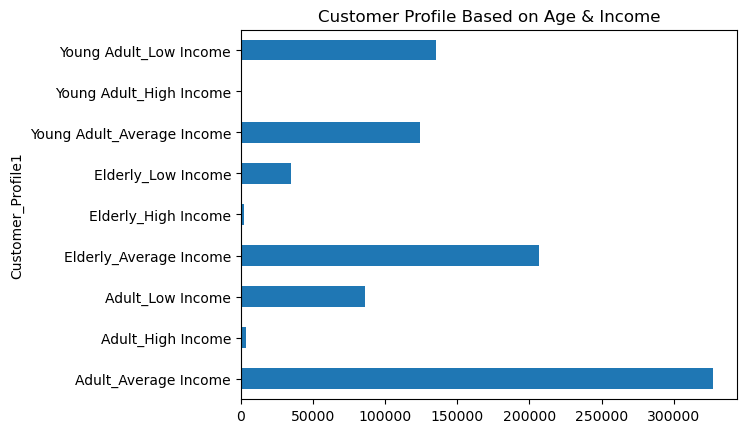

In [45]:
plt.title('Customer Profile Based on Age & Income')
bar1=df_final_data['Customer_Profile1'].value_counts().sort_index().plot.barh()

In [46]:
bar1.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Age&Income.png'))

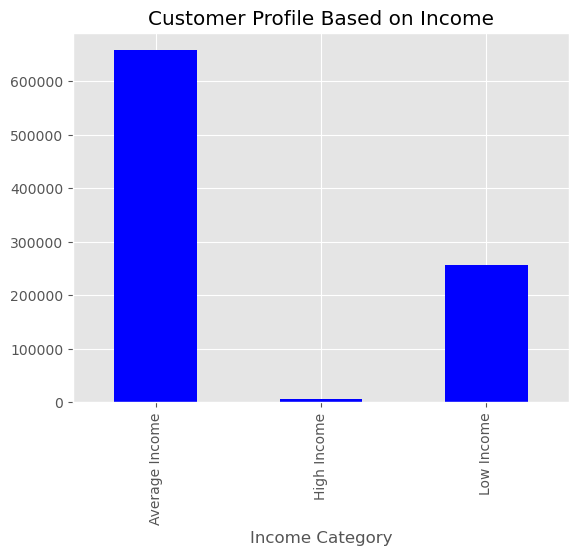

In [47]:
plt.style.use('ggplot')
plt.title('Customer Profile Based on Income')
bar1=df_final_data['Income Category'].value_counts().sort_index().plot.bar(color='blue')


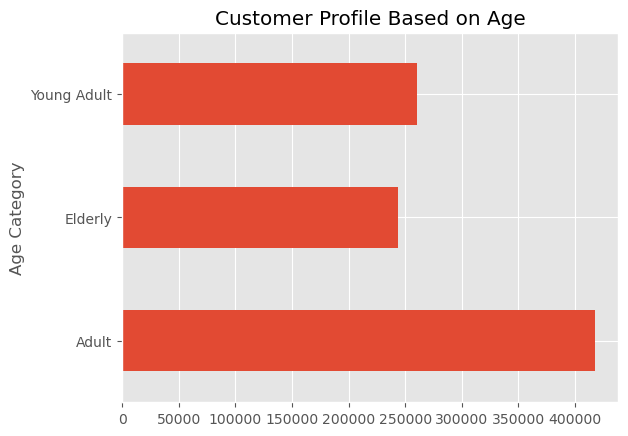

In [48]:
plt.style.use('ggplot')
plt.title('Customer Profile Based on Age')
bar1=df_final_data['Age Category'].value_counts().sort_index().plot.barh()

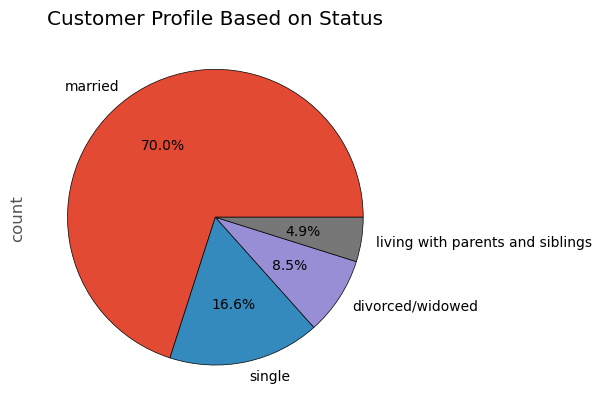

In [49]:
#Customer Profile based on status


plt.title('Customer Profile Based on Status')
pie1 = df_final_data['Status'].value_counts().plot.pie(autopct='%1.1f%%', subplots=True, figsize=(8, 4), wedgeprops = {'edgecolor':'black'})


# Customer Profile for usage frequency & expenditure

In [50]:
 frequency = df_final_data.groupby('Customer_Profile').agg({'days_since_prior_order':['mean', 'min', 'max']})

In [51]:
frequency

days_since_prior_order           
                                                             mean  min   max
Customer_Profile                                                            
Adult_Average Income_No Dependants                      10.652572  0.0  30.0
Adult_Average Income_With Dependants                    10.674261  0.0  30.0
Adult_High Income_No Dependants                          8.650278  0.0  30.0
Adult_High Income_With Dependants                        9.570041  0.0  30.0
Adult_Low Income_No Dependants                          10.749450  0.0  30.0
Adult_Low Income_With Dependants                        10.916669  0.0  30.0
Elderly_Average Income_No Dependants                    10.505132  0.0  30.0
Elderly_Average Income_With Dependants                  10.718637  0.0  30.0
Elderly_High Income_No Dependants                        9.147887  0.0  30.0
Elderly_High Income_With Dependants                     10.415469  0.0  30.0
Elderly_Low Income_No Dependants                        11.113305  0.0  30.0
Elderly_Low Income_With Dependants                      10.958399  0.0  30.0
Young Adult_Average Income_No Dependants                10.774927  0.0  30.0
Young Adult_Average Income_With Dependants              10.707913  0.0  30.0
Young Adult_High Income_No Dependants                   11.319392  0.0  30.0
Young Adult_High Income_With Dependants                 10.909091  0.0  30.0
Young Adult_Low Income_No Dependants                    10.714407  0.0  30.0
Young Adult_Low Income_With Dependants                  10.765194  0.0  30.0

In [52]:
frequency.to_clipboard()

In [53]:
expenditure = df_final_data.groupby('Customer_Profile').agg({'prices':['mean', 'min', 'max']})

In [54]:
expenditure

prices           
                                                mean  min   max
Customer_Profile                                               
Adult_Average Income_No Dependants          7.896937  1.0  24.3
Adult_Average Income_With Dependants        7.851485  1.0  24.5
Adult_High Income_No Dependants             8.686787  1.0  21.6
Adult_High Income_With Dependants           8.067277  1.0  23.8
Adult_Low Income_No Dependants              7.345070  1.0  24.3
Adult_Low Income_With Dependants            7.385017  1.0  24.3
Elderly_Average Income_No Dependants        7.790272  1.0  24.5
Elderly_Average Income_With Dependants      7.812334  1.0  24.5
Elderly_High Income_No Dependants           6.865247  1.0  23.8
Elderly_High Income_With Dependants         7.947246  1.0  23.8
Elderly_Low Income_No Dependants            7.003742  1.0  23.8
Elderly_Low Income_With Dependants          7.203034  1.0  24.5
Young Adult_Average Income_No Dependants    7.843191  1.0  24.3
Young Adult_Average Income_With Dependants  7.769962  1.0  24.5
Young Adult_High Income_No Dependants       8.884477  1.0  21.6
Young Adult_High Income_With Dependants     8.024611  1.0  21.6
Young Adult_Low Income_No Dependants        7.662947  1.0  24.5
Young Adult_Low Income_With Dependants      7.621506  1.0  24.5

In [55]:
expenditure.to_clipboard()

In [56]:
bar2 = df_final_data.groupby('Region')['Customer_Profile'].value_counts().unstack()

Text(0.5, 1.0, 'Expenditure in different regions')

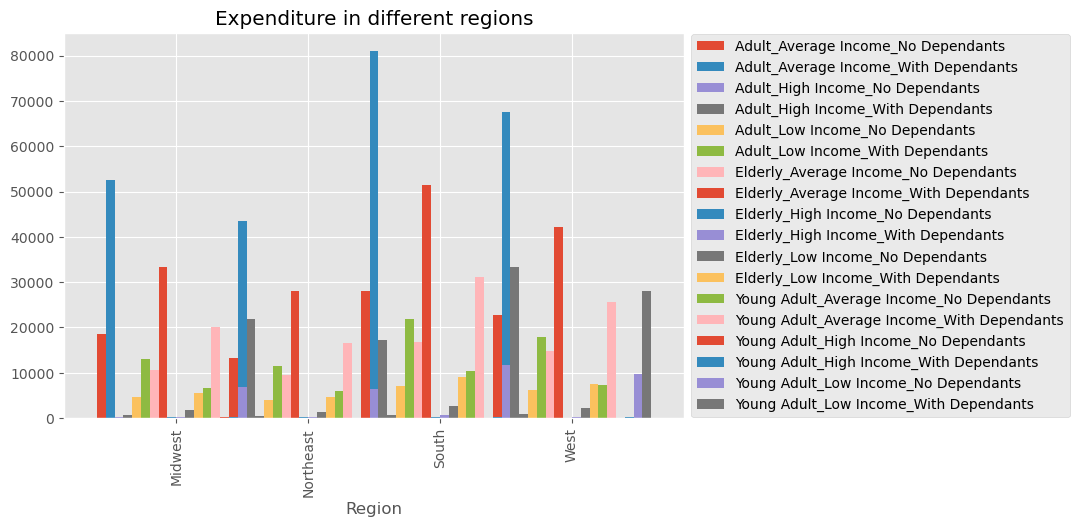

In [64]:
plt.style.use('ggplot')
barwidth=1.2
bar2.plot.bar(width=barwidth, figsize=(8, 5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Expenditure in different regions')

In [58]:
bar2.to_clipboard()

In [59]:
bar3 = df_final_data.groupby('department_id')['Customer_Profile'].value_counts().unstack()

Text(0.5, 1.0, 'Popular departments in different regions')

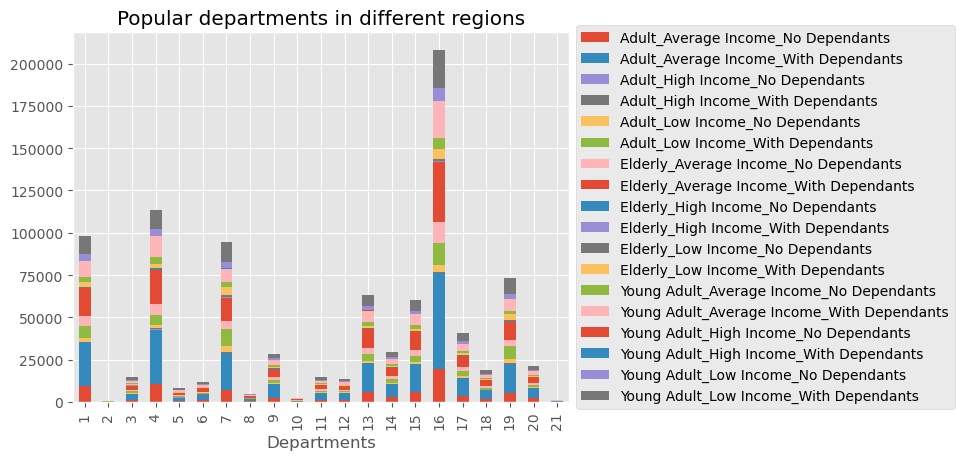

In [65]:
plt.style.use('ggplot')
bar3.plot.bar(stacked=True)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Departments')
plt.title('Popular departments in different regions')

In [61]:
bar3.to_clipboard()

# Observation - There was no significant difference as long as region was conserned. The top departments where people focused more were 1,4,7, and 16. 13,15 and 19 were also significantly popular. Weekends were the most busiest days for ordering products.

In [62]:
# Exporting final dataset

df_final_data.to_pickle(os.path.join(path,'02_Data','Prepared_Data','Final_Dataset.pkl'))

In [63]:
df_final_data.to_csv(os.path.join(path, '02_Data','Prepared_Data','Final_Dataset.csv'))